# Example notebook for the ATOM pipeline
---------------------------------

Load the data with one of the three imported datasets before running the
ATOM function. These datasets are provided by sklearn and are very small
and easy to learn. You can learn more about these datasets
at https://scikit-learn.org/stable/datasets/index.html.

    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

In [10]:
# Import packages
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from sklearn.metrics import f1_score
from atom import ATOMClassifier

# Load the dataset's fetatures and targets as arrays
X, Y = load_wine(return_X_y=True)

## Run ATOM pipeline

In [11]:
# Call ATOMclass for ML task exploration
atom = ATOMClassifier(X, Y, n_jobs=-1, verbose=3)

# Create a custom metric
def f1_macro(pred, true):
    return f1_score(pred, true, average='macro')

# Fit the pipeline with the selected models
atom.fit(models=['LDA','RF', 'lSVM'],
         metric=f1_macro,
         max_iter=7,
         init_points=1,
         cv=3,
         bagging=10)

<<=============== ATOM ===============>>
Parallel processing with 4 cores.
Initial data cleaning...
Algorithm task: multiclass classification. Number of classes: 3.

Dataset stats ===================>
Shape: (178, 14)
----------------------------------
Size of training set: 124
Size of test set: 54
----------------------------------
Instances in target per class:
   total  train_set  test_set
0     59         40        19
1     71         49        22
2     48         35        13


Running pipeline =================>
Models in pipeline: LDA, RF, lSVM
Metric: f1_macro


Running BO for Linear Discriminant Analysis...
Parameters --> {'solver': 'svd'}
Evaluation --> f1_macro: 0.9848
Parameters --> {'solver': 'svd'}
Evaluation --> f1_macro: 0.9848
num acquisition: 1, time elapsed: 1.04s
Parameters --> {'solver': 'eigen', 'shrinkage': 0.9}
Evaluation --> f1_macro: 0.7248
num acquisition: 2, time elapsed: 1.47s
Parameters --> {'solver': 'svd'}
Evaluation --> f1_macro: 0.9848
num acquisition:

## Analyze results

In [12]:
atom.results

,model,score_train,score_test,time,bagging_mean,bagging_std,bagging_time
0,LDA,1.0,1.000000,5.21s,0.982649,0.010076,0.08s
1,RF,1.0,0.913580,6.68s,0.918293,0.023776,2.5s
2,lSVM,1.0,0.963494,0.45s,0.970401,0.011938,0.08s


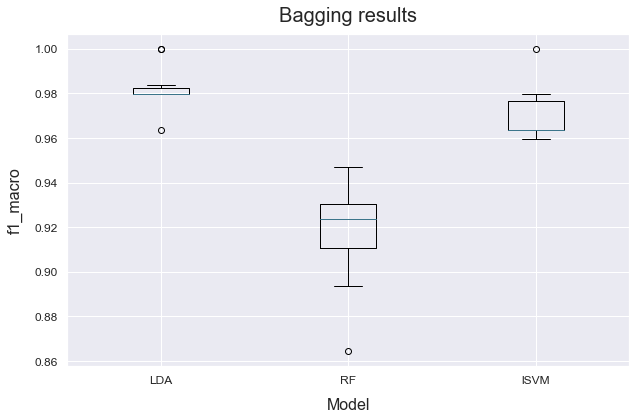

In [13]:
atom.plot_bagging()

## Let's have a deeper look into the support vector machine

In [14]:
# Get the results on some other metrics
print('Jaccard score:', atom.lsvm.jaccard)
print('Recall score:', atom.lsvm.recall)

Jaccard score: 0.9288589832068092
Recall score: 0.9629629629629629


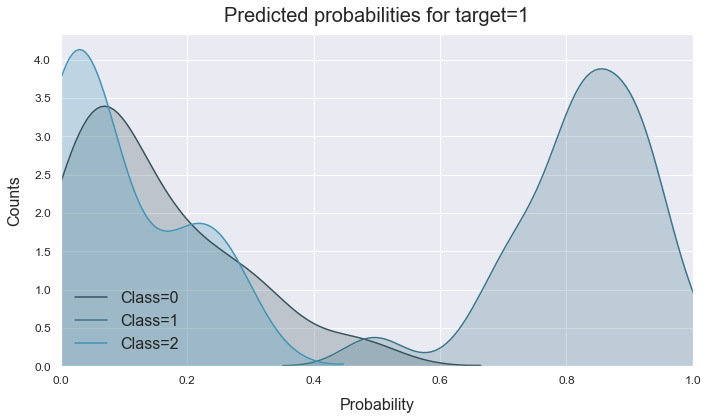

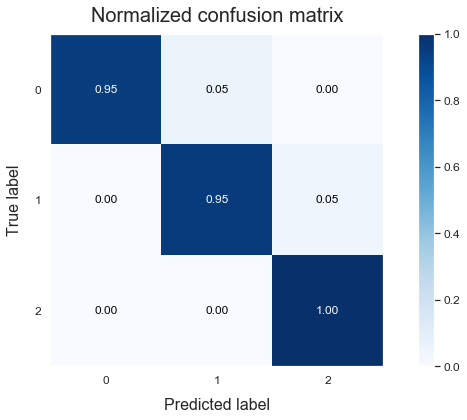

In [15]:
# Plot the probability distribution of having breast cancer
atom.lsvm.plot_probabilities()

# Plot the consufion matrix
atom.lsvm.plot_confusion_matrix()

In [16]:
# Save the model for production
atom.lsvm.save('SVM_final')

Model saved successfully!
